# K-fold cross validation

Corss Validation Accuracies: [0.77622378 0.8041958  0.79020979 0.88111888 0.80985915]
Average Accuracy: 0.8123214813355659

 Confusion Matrix [[367  57]
 [ 77 213]]

 Classification Report               precision    recall  f1-score   support

           0       0.83      0.87      0.85       424
           1       0.79      0.73      0.76       290

    accuracy                           0.81       714
   macro avg       0.81      0.80      0.80       714
weighted avg       0.81      0.81      0.81       714


 ROC AUC score 0.8583360442420299


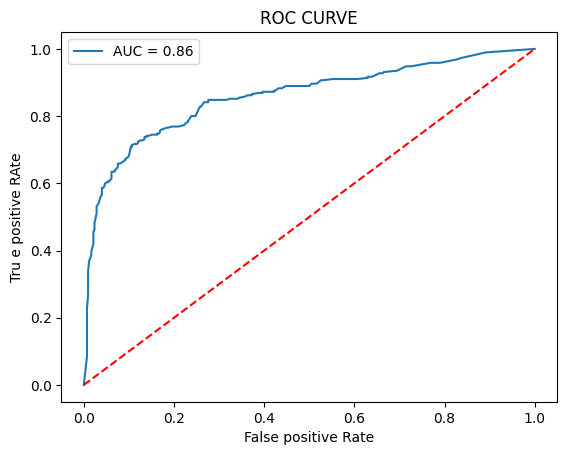

In [ ]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report

# step 1
df = pd.read_csv("./titanic.csv")[['Survived', 'Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'Fare']].dropna()

df["Gender"] = LabelEncoder().fit_transform(df["Gender"])

X = df.drop("Survived", axis = 1)
y = df["Survived"]

# step 2
kf = KFold( n_splits=5, shuffle= True, random_state=42)
model = RandomForestClassifier(random_state=42)

# step 3
scores = cross_val_score(model, X, y , cv=kf, scoring="accuracy")
print("Corss Validation Accuracies:", scores)
print("Average Accuracy:", scores.mean())

#step 4

y_pred = cross_val_predict(model, X, y ,cv = kf)
y_prob = cross_val_predict(model, X, y, cv=kf, method='predict_proba')[:, 1]


#step 5

print("\n Confusion Matrix", confusion_matrix(y, y_pred))
print("\n Classification Report", classification_report(y, y_pred))
print("\n ROC AUC score", roc_auc_score(y, y_prob))

# step 6
fpr, tpr, _ = roc_curve(y, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y, y_prob):.2f}")
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False positive Rate")
plt.ylabel("Tru e positive RAte")
plt.title("ROC CURVE")
plt.legend()
plt.show()

# Activity 2    


Corss Validation Accuracies: [1.         0.96666667 0.93333333 0.93333333 0.96666667]
Average Accuracy: 0.9600000000000002

 Confusion Matrix [[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]

 Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



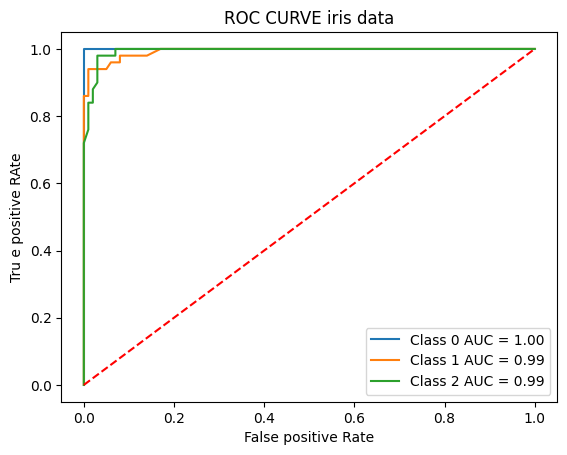

In [5]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

# step 1 Laoding irirs data
iris = load_iris()
X = iris.data
y = iris.target
 
# step 2 Kfold model 
kf = KFold( n_splits=5, shuffle= True, random_state=42)
model = RandomForestClassifier(random_state=42)

# step 3 cross validation accuracy
scores = cross_val_score(model, X, y , cv=kf, scoring="accuracy")
print("Corss Validation Accuracies:", scores)
print("Average Accuracy:", scores.mean())

#step 4

y_pred = cross_val_predict(model, X, y ,cv = kf)
y_prob = cross_val_predict(model, X, y, cv=kf, method='predict_proba')


#step 5
# condusion matrix
print("\n Confusion Matrix", confusion_matrix(y, y_pred))

# precision and recall
print("\n Classification Report", classification_report(y, y_pred))

# step 7 roc curve and auc for multiclass
lb = LabelBinarizer()
y_bin = lb.fit_transform(y)

plt.figure()

# step 8
for i in range(y_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} AUC = {roc_auc:.2f}")
    
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False positive Rate")
plt.ylabel("Tru e positive RAte")
plt.title("ROC CURVE iris data")
plt.legend()
plt.show()

<!-- K-fold Cross Validation -->